## Demo file on training the auto-encoder model

In this demo, we train the auto-encoder model for 11 data points. 

In the training, we estimate the true error by the testing samples.

Fianlly, we show the open3d and matplotlib visualization for original point clouds and the recovered point clouds.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#sample = np.load("trim_sample.npy",allow_pickle=True)

In [3]:
#raw_sample = np.load("sample.npy",allow_pickle=True)

In [4]:
"""AE_Ext.py
max1 = 0
for x in raw_sample:
    #print(x.shape)
    #print(max1)
    if len(x) > max1:
        max1 = len(x)
max1
"""

'AE_Ext.py\nmax1 = 0\nfor x in raw_sample:\n    #print(x.shape)\n    #print(max1)\n    if len(x) > max1:\n        max1 = len(x)\nmax1\n'

In [5]:
""""
D = 15300

data_ext = []
for x in raw_sample:
    if len(x) < D:
        r = D - len(x)
        zeros = np.zeros((r,3))
        data_ext.append(np.vstack((x,zeros)))
"""

'"\nD = 15300\n\ndata_ext = []\nfor x in raw_sample:\n    if len(x) < D:\n        r = D - len(x)\n        zeros = np.zeros((r,3))\n        data_ext.append(np.vstack((x,zeros)))\n'

In [6]:
sample = np.load("data_ext.npy",allow_pickle=True)
sample = sample.reshape(4325,-1)

In [7]:
sample.shape

(4325, 45900)

In [8]:
train =  sample[:1000,]
test  =  sample[-300:,]

In [9]:
train.shape

(1000, 45900)

In [10]:
from AE_Ext import Auto_Encoder
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
import os

In [11]:
learning_rate = 0.0001
batch_size = 64
epochsize = 30

In [12]:
AE = Auto_Encoder()
MSELoss = nn.MSELoss()
optimizer = optim.Adam(AE.parameters(), lr=learning_rate)

In [13]:
AE.parameters()

<generator object Module.parameters at 0x160b74900>

In [14]:
Train = torch.from_numpy(train).to(torch.float32)
Train.shape

torch.Size([1000, 45900])

In [15]:
loss1 = MSELoss (AE(Train[0]),Train[0])

In [16]:
loss1

tensor(0.0991, grad_fn=<MseLossBackward0>)

In [17]:
Test = torch.from_numpy(test).to(torch.float32)
def evaluate(AE):
    idx = torch.from_numpy(np.random.choice(100, 5))
    test_sample = Test[idx]
    r = 0
    for x in test_sample:
        out = AE(x)
        r += MSELoss(x,out)
    return r

In [18]:
losses = []

In [19]:
### Train
count = 0
for s in Train:
    s_prime = AE(s)

    # loss 
    loss = MSELoss(s_prime, s)
    #print(loss)
    # update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if count > 10:
        break
    if count%1 == 0:
        r = evaluate(AE)
        losses.append(r)
        print(f"The test error of itration {count} is {r}")
    count+=1

The test error of itration 0 is 0.4799787998199463
The test error of itration 1 is 0.42195916175842285
The test error of itration 2 is 0.41972699761390686
The test error of itration 3 is 0.4846813380718231
The test error of itration 4 is 0.3939799666404724
The test error of itration 5 is 0.4091411530971527
The test error of itration 6 is 0.4073711335659027
The test error of itration 7 is 0.3889160752296448
The test error of itration 8 is 0.441976934671402
The test error of itration 9 is 0.3391977548599243
The test error of itration 10 is 0.34241655468940735


In [20]:
loss2 = MSELoss (AE(Train[0]),Train[0])

In [21]:
loss2

tensor(0.0308, grad_fn=<MseLossBackward0>)

In [22]:
loss1 - loss2

tensor(0.0683, grad_fn=<SubBackward0>)

In [23]:
losses

[tensor(0.4800, grad_fn=<AddBackward0>),
 tensor(0.4220, grad_fn=<AddBackward0>),
 tensor(0.4197, grad_fn=<AddBackward0>),
 tensor(0.4847, grad_fn=<AddBackward0>),
 tensor(0.3940, grad_fn=<AddBackward0>),
 tensor(0.4091, grad_fn=<AddBackward0>),
 tensor(0.4074, grad_fn=<AddBackward0>),
 tensor(0.3889, grad_fn=<AddBackward0>),
 tensor(0.4420, grad_fn=<AddBackward0>),
 tensor(0.3392, grad_fn=<AddBackward0>),
 tensor(0.3424, grad_fn=<AddBackward0>)]

In [24]:
sample1 = Test[299]
sample1 = sample1.reshape(-1,3)

In [25]:
recover_sample = AE(Test[0]).reshape(-1,3)

In [26]:
import open3d as o3d

In [27]:
pcd1 = o3d.geometry.PointCloud()
pcd2 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(sample1.detach().numpy()) 
pcd2.points = o3d.utility.Vector3dVector(recover_sample.detach().numpy() )

In [46]:
o3d.visualization.draw_geometries([pcd1])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [47]:
o3d.visualization.draw_geometries([pcd2])

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [30]:
np.sum(recover_sample.detach().numpy() != 0)

45900

In [31]:
recover_sample[recover_sample!=0]

tensor([-0.7929,  0.1991, -0.0982,  ..., -0.0217,  0.0128, -0.0089],
       grad_fn=<IndexBackward0>)

In [32]:
Test[0]

tensor([-0.4414,  0.1824, -0.0583,  ...,  0.0000,  0.0000,  0.0000])

In [33]:
AE(Test[0])[:100]

tensor([-0.7974,  0.2014, -0.0836, -0.7851,  0.1974, -0.1164, -0.7895,  0.2567,
        -0.0382, -0.8026,  0.1291, -0.0376, -0.7761,  0.2084, -0.0179, -0.7555,
         0.1843, -0.0362, -0.7800,  0.1966, -0.0164, -0.6953,  0.2408, -0.0598,
        -0.7486,  0.1573, -0.0968, -0.7749,  0.2201, -0.1134, -0.7702,  0.1869,
        -0.0841, -0.7773,  0.1462, -0.1262, -0.7668,  0.1529, -0.1357, -0.7681,
         0.1515, -0.0551, -0.8312,  0.2195, -0.0440, -0.7507,  0.0796, -0.0354,
        -0.7692,  0.1387, -0.0700, -0.7983,  0.1904, -0.1002, -0.7623,  0.1761,
        -0.0507, -0.7723,  0.2088, -0.0858, -0.7818,  0.1605, -0.0192, -0.7621,
         0.1867, -0.1355, -0.7748,  0.2162, -0.0525, -0.7685,  0.1805, -0.0291,
        -0.8233,  0.1092, -0.0658, -0.7568,  0.2053, -0.0407, -0.7966,  0.1475,
        -0.0219, -0.7897,  0.1979, -0.0725, -0.7550,  0.1419,  0.0462, -0.7924,
         0.2420,  0.0140, -0.7532,  0.2199, -0.0519, -0.7560,  0.2024, -0.0138,
        -0.7957,  0.1781, -0.0434, -0.76

In [34]:
losses = torch.Tensor(losses)
losses = losses.detach().numpy()

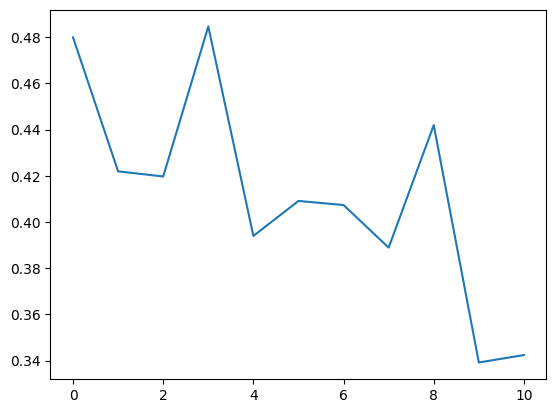

In [35]:
plt.plot(losses)

In [36]:
a = np.asanyarray([1,2,3]).reshape(1,-1)

In [37]:
b = np.asanyarray([[1,2,2,],[2,3,2]])

In [38]:

print(a.shape)
print(b.shape)

(1, 3)
(2, 3)


In [39]:
np.append(a,b,axis=0).shape

(3, 3)

In [41]:
original =  Test[0].detach().numpy().reshape(-1,3)
recovered = recover_sample.detach().numpy()

In [42]:
print(original.shape)
print(recovered.shape)

(15300, 3)
(15300, 3)


In [43]:
X1 = original[:,0]
Y1 = original[:,1]
Z1 = original[:,2] 

/var/folders/vw/0wr8h_mx7t754p2l19b2mc_r0000gn/T/ipykernel_62206/2125788375.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  surf = ax.scatter(X1, Y1, Z1, cmap=cm.coolwarm,


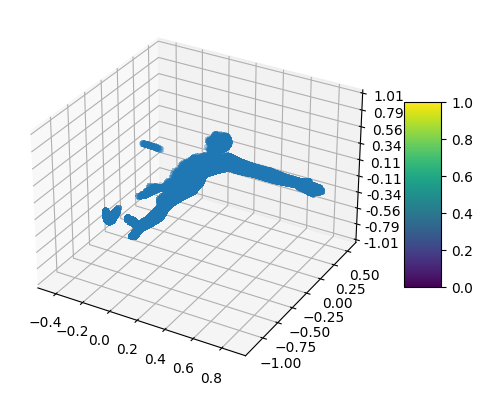

In [44]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.scatter(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

/var/folders/vw/0wr8h_mx7t754p2l19b2mc_r0000gn/T/ipykernel_62206/909579460.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  surf = ax.scatter(X2, Y2, Z2, cmap=cm.coolwarm,


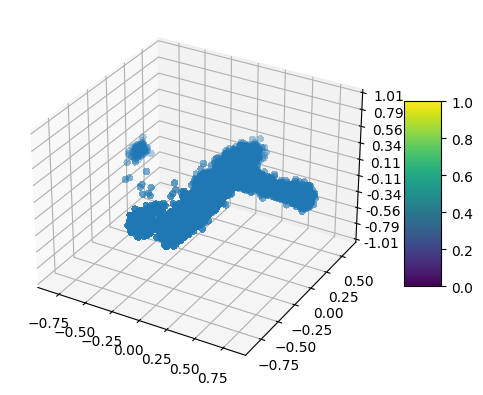

In [45]:
X2 = recovered[:,0]
Y2 = recovered[:,1]
Z2 = recovered[:,2]

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.scatter(X2, Y2, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()